<a href="https://colab.research.google.com/github/simran0912/PybEPIDEMIOLOGY_PROJECT/blob/master/NEO4J_CENTRALITY_EPIDEMIOLOGY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install neo4j

**NEO4J SANDBOX FOR CENTRALITY ALGORITHMS**
---
Neo4j sandbox enables you to use neo4j without the need of downloading it.
This is really helpful for getting started with neo4j but it has few drawbacks -


1.   We can't add plugins like spatial plugin, neomap etc
2.   The data it can handle is quite less compared to the desktop experience.
3.   It is available for maximum of 10 days only.

To visualize the following queries which we are going to run, one can go to their own created neo4j sandbox and by changing the uri,username and password in the following line of code or can also use the "https://localhost:7687" as uri if one has neo4j installed.

driver = GraphDatabase.driver(uri,auth=basic_auth(username, password))

Or, can send their email id to us to add them in the sandbox which we are using for this database-


In [ ]:
from neo4j import GraphDatabase, basic_auth
driver = GraphDatabase.driver(
    "bolt://34.227.94.112:34182",
    auth=basic_auth("neo4j", "detents-threat-buoy"))
session = driver.session()

**IMPORTING DATA FOR RUNNING THE CENTRALITY ALGORITHMS**
---
* The csv data to be imported is the data extracted from neo4j from shapefiles. The spatial plugin is not available for sandbox so we have not shown the query for how to import the shapefiles. We have covered importing the shapefiles part at the end of centrality algorith as another section. 
* The main csv file is separated into two separate csv(s) for origin and destination for shape file "S05-b-10_SYUTO-1-g_PersonTripODAmount.shp". The orig.csv file can be found on https://raw.githubusercontent.com/simran0912/HP_PROJECT/master/orig.csv The dest.csv file can be found on https://raw.githubusercontent.com/simran0912/HP_PROJECT/master/dest.csv. 
* We have compressed the origin and destination data to handle 200 nodes as neo4j sandbox cant handle nodes more than a certain limit. Actual files have nearly 51000 rows and when nodes are created they are nearly 102000 nodes. 

In [ ]:
cypher_query = [
"LOAD CSV WITH HEADERS FROM 'https://raw.githubusercontent.com/simran0912/HP_PROJECT/master/dest_compressed.csv' AS row CREATE (n:dest_label) SET n = row, n.id_dest = row.ID, n.DEST = row.DEST, n.ORIGINALID=row.ORIGINAL_ID, n.count_35=row.total_trip;",
"LOAD CSV WITH HEADERS FROM 'https://raw.githubusercontent.com/simran0912/HP_PROJECT/master/orig_compressed.csv' AS row CREATE (n:orig_label) SET n = row, n.id_orig = row.ID, n.ORIG = row.ORIG, n.ORIGINALID=row.ORIGINAL_ID;"]
 
for i in cypher_query:
  results = session.run(i, parameters={})

In [ ]:
#To view the graph, run the following query in neo4j 
c="MATCH (n) RETURN n LIMIT 376"
results = session.run(c, parameters={})
for i in results:
  print(i)

<Record n=<Node id=0 labels=frozenset({'dest_label'}) properties={'ORIGINAL_ID': '5178', 'id_dest': '65', 'ID': '65', 'ORIGINALID': '5178', 'DEST': '139.864997,35.6591891'}>>
<Record n=<Node id=1 labels=frozenset({'dest_label'}) properties={'ORIGINAL_ID': '5178', 'id_dest': '66', 'ID': '66', 'ORIGINALID': '5178', 'DEST': '139.8359308,35.683108'}>>
<Record n=<Node id=2 labels=frozenset({'dest_label'}) properties={'ORIGINAL_ID': '5178', 'id_dest': '67', 'ID': '67', 'ORIGINALID': '5178', 'DEST': '139.8181591,35.73293302'}>>
<Record n=<Node id=3 labels=frozenset({'dest_label'}) properties={'ORIGINAL_ID': '5178', 'id_dest': '68', 'ID': '68', 'ORIGINALID': '5178', 'DEST': '139.8107341,36.11032436'}>>
<Record n=<Node id=4 labels=frozenset({'dest_label'}) properties={'ORIGINAL_ID': '5178', 'id_dest': '69', 'ID': '69', 'ORIGINALID': '5178', 'DEST': '139.798086,35.72266805'}>>
<Record n=<Node id=5 labels=frozenset({'dest_label'}) properties={'ORIGINAL_ID': '5178', 'id_dest': '70', 'ID': '70', 'O

This is how your graph looks after inserting the data. You can view it on neo4j as well.
![how your graph looks after inserting the data](https://i.imgur.com/PjNpoO9.jpg)
It is having no relationships as of now.

**CREATE RELATION BETWEEN THE ORIGIN AND DESTINATION BY MATCHING ON THEIR IDs.**

In [ ]:
cypher_query="MATCH (d:dest_label),(o:orig_label) WHERE d.id_dest = o.id_orig CREATE (o)-[:TRAVELED_TO]->(d);"
results = session.run(cypher_query, parameters={})

This is how your graph looks after creating relationships. You can view it on neo4j as well.
![alt text](https://i.imgur.com/W88qdce.png)
Each destination node is now connected to its origin node. For the final graph, we need to merge the same origins and destinations based on their coordinates.


**MERGING THE DUPLICATE NODES**
---
MANY DUPLICATE NODES HAVE BEEN CREATED SO WE NEED TO MERGE THEM. THE QUERIES FOR MERGING IS SHOWN AS BELOW.

(THE FOLLOWING CODE CELL CAN BE USED ON THE UN-COMPRESSED DATA AS WELL. WE CAN DO THIS BECAUSE IT WONT MAKE A DIFFERENCE IF THE MENTIONED COORDINATES ARE NOT THERE)

In [ ]:
cypher_query=["MATCH (z:orig_label) WHERE z.ORIG='139.7570442,35.68431018' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.7418047,35.68723724' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.7668389,35.69636092' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.7543978,35.67335735' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.7828377,35.68697357' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.7720878,35.67964466' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.7655765,35.67051251' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.7745685,35.66998822' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.7790324,35.65777559' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.7259117,35.67034591' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.745531,35.66203467' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.7538057,35.63696412' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.7353411,35.65164471' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.7302876,35.63740051' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.7045167,35.63454693' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.6808978,35.61920867' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.6892333,35.64785201' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.7235183,35.62339142' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.7439541,35.61712843' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.7340215,35.59835554' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.7106939,35.611439' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.7591421,35.60166381' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.7134883,35.59052764' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.7186254,35.57677553' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.7572248,35.57975848' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.7696799,35.55199857' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.7133435,35.54796544' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.6905137,35.56424052' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.6745243,35.58645444' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.6921517,35.59146391' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.7148346,35.5625941' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.7293076,35.73465323' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.7097207,35.72781321' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.6897372,35.73287496' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.7538668,35.72391625' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.761848,35.70762469' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.7438859,35.7111742' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.7314637,35.71996232' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.7352426,35.70163352' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.7227033,35.68557888' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.7054059,35.69702138' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.6916144,35.69467596' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.6917738,35.71712659' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.7184147,35.70289695' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.6994244,35.67840857' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.7037923,35.66398901' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.7110099,35.64998239' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.6800175,35.67391643' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.8014049,35.73482344' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.7795161,35.73804087' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.7658736,35.74816947' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.798086,35.72266805' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.7884656,35.71271137' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.7862782,35.70297098' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.7743237,35.71854476' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.8181591,35.73293302' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.8310292,35.7175019' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.82015,35.71217015' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.8065515,35.70603732' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.813673,35.69721479' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.8001083,35.69497339' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.813861,35.71975672' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.8304067,35.69892926' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.8359308,35.683108' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.8320084,35.66476368' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.8314344,35.63884089' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.8144215,35.67064958' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.8083678,35.65666891' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.7903151,35.63279825' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.7995729,35.67318708' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.8011918,35.6828198' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.815395,35.68444016' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.6521803,35.72152248' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.6748936,35.70599871' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.6712381,35.68951083' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.6397615,35.70590766' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.6507129,35.68215948' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.6265447,35.68332672' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.6070025,35.69722391' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.6095267,35.71886129' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.6610513,35.66186772' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.6714428,35.64180982' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.6416671,35.6230338' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.6607187,35.60385406' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.6055519,35.63169093' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.601761,35.66326425' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.6271702,35.66082868' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.6381256,35.64687005' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.6595186,35.75814865' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.6572866,35.73783977' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.6183899,35.74402599' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.5905576,35.73212866' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.585516,35.75775182' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.6310894,35.75931657' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.6880793,35.7653754' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.7025104,35.75068756' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.6506132,35.77688066' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.6688077,35.79063555' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.7156401,35.78123441' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.7356571,35.76131306' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.7442217,35.74438911' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.8385353,35.77510687' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.8011804,35.74801588' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.8112359,35.78472475' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.7758682,35.76415097' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.769647,35.78788634' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.8666858,35.77777795' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.8726048,35.74972744' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.854527,35.72662459' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.8392082,35.74994195' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.8466707,35.70243341' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.8693279,35.69695556' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.8847711,35.73064287' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.8970821,35.69835739' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.864997,35.6591891' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.5663243,35.66351504' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.5404373,35.65276807' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.5771967,35.63488352' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.5604214,35.68476942' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.5615518,35.70807085' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.5542133,35.73813701' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.5356108,35.73019027' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.5222183,35.78146073' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.5199827,35.75399834' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.4987436,35.66587847' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.4664105,35.67548488' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.4387389,35.68629901' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.5110479,35.70104903' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.4614633,35.70546324' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.4988877,35.72664408' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.4610123,35.72848357' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.4723993,35.75927471' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.400839,35.72538485' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.4092385,35.70922959' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.4089357,35.69313515' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.3821591,35.70648178' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.3560332,35.70771773' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.4265412,35.75049748' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.3838793,35.75043498' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.4649487,35.53898121' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.4565402,35.57848649' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.3851262,35.59473131' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.4484397,35.64415389' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.4342272,35.62162696' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.4929795,35.63292914' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.3949259,35.67172644' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.403683,35.65279468' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.338942,35.68494712' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.3394155,35.63446915' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.3839387,35.6240288' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.2252029,35.66491326' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.3274935,35.65639684' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.2941787,35.63310795' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.2793114,35.67541436' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.3492783,35.77424167' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.3363283,35.73600741' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.3153234,35.76399039' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.226359,35.7586995' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.279023,35.78618122' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.2223056,35.81280012' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.2938931,35.73264141' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.1950951,35.73292595' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.0554067,35.82256402' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.1046656,35.72499797' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.6221012,35.45638927' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.6117987,35.46351347' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.6153173,35.44880289' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.6300021,35.46052475' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.631663,35.44226483' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.6380277,35.44704104' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.6467885,35.44797706' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.6616087,35.43815423' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.648318,35.43338639' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.6650858,35.42202442' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.6284277,35.41827301' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.6138863,35.40923243' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.622196,35.39987651' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.614541,35.38469281' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.6010079,35.37199473' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:orig_label) WHERE z.ORIG='139.6238674,35.43589949' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='138.9291469,36.02160492' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='138.9489562,35.96044165' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.0315104,35.2322522' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.0451817,35.42495477' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.0554067,35.82256402' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.0557067,35.82286402' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.0700444,35.31009747' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.0788658,35.16619272' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.0872547,36.19524887' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.1046656,35.72499797' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.1049656,35.72529797' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.1209344,35.24726885' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.1228435,36.07847665' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.1247277,35.33512184' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.1306116,35.39219272' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.1335271,35.16537687' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.1462596,36.19926476' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.1531414,35.60684888' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.1651595,35.33499737' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.1831305,35.53633931' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.1928401,35.29651109' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.1930782,35.40923387' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.1950951,35.73292595' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.1953951,35.73322595' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.2038464,35.6119023' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.2142842,36.10249655' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.2151056,35.33613761' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.2199415,35.88824053' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.2223056,35.81280012' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.2226056,35.81310012' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.2252029,35.66491326' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.2255029,35.66521326' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.226359,35.7586995' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.226659,35.7589995' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.2289803,35.4872452' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.2370814,35.37007659' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.2495679,35.30788946' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.2638745,36.13302532' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.2659448,36.19825251' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.2780848,35.97335758' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.279023,35.78618122' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.2793114,35.67541436' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.279323,35.78648122' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.2796114,35.67571436' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.2867316,35.34936763' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.2885674,35.31665622' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.2922594,35.41001931' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.2938931,35.73264141' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.2941787,35.63310795' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.2941931,35.73294141' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.2944787,35.63340795' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.2979084,35.58110785' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.2990019,35.52888972' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.3153234,35.76399039' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.3156234,35.76429039' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.3195737,35.47868812' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.3274935,35.65639684' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.3277935,35.65669684' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.3354725,36.06342507' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.3363283,35.73600741' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.3366283,35.73630741' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.338942,35.68494712' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.339242,35.68524712' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.3393184,35.8964452' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.3394155,35.63446915' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.3397155,35.63476915' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.3440592,35.43339947' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.3443383,35.36790019' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.3459347,35.55913417' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.3472905,35.33314023' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.3475636,35.58930738' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.3492783,35.77424167' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.3495783,35.77454167' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.3560332,35.70771773' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.3563332,35.70801773' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.3564965,36.17443043' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.3674806,35.81789711' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.3778959,36.21473415' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.3810604,36.1232511' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.3821591,35.70648178' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.3824591,35.70678178' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.3838793,35.75043498' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.3839387,35.6240288' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.3841793,35.75073498' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.3842387,35.6243288' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.3851262,35.59473131' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.3854262,35.59503131' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.3857002,35.37553723' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.3895161,35.51951265' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.3928914,35.43773644' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.3943715,35.93568771' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.3949259,35.67172644' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.3952259,35.67202644' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.3989001,35.5619657' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.400149,35.96358946' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.400839,35.72538485' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.401139,35.72568485' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.403683,35.65279468' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.403983,35.65309468' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.4045614,35.33360942' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.4062636,35.86547228' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.4089357,35.69313515' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.4091837,35.48759376' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.4092357,35.69343515' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.4092385,35.70922959' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.4095385,35.70952959' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.4151428,36.03647156' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.4187199,35.36373604' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.4220794,35.78889353' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.4265412,35.75049748' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.4268412,35.75079748' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.4307168,35.44000687' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.4333536,35.52772311' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.4342272,35.62162696' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.4343557,35.92537255' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.4345272,35.62192696' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.4387389,35.68629901' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.4390389,35.68659901' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.4437299,35.84817667' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.4484397,35.64415389' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.4487397,35.64445389' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.4491,35.3873245' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.4501961,35.50073944' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.4565402,35.57848649' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.4568402,35.57878649' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.4602964,35.45752333' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.4610123,35.72848357' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.4613123,35.72878357' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.4614633,35.70546324' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.4617633,35.70576324' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.4647708,35.80122407' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.4649487,35.53898121' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.4652487,35.53928121' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.4664105,35.67548488' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.4667105,35.67578488' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.4681389,35.88174277' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.469531,35.32823708' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.4700466,36.14817102' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.4723993,35.75927471' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.4726993,35.75957471' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.476632,35.60655032' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.4802949,35.577127' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.4818747,35.47743863' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.4819345,35.91278683' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.4841535,35.98361375' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.4879846,35.41742808' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.4919623,35.3456325' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.4929795,35.63292914' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.4932795,35.63322914' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.4982557,35.81177028' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.4987436,35.66587847' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.4988877,35.72664408' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.4990025,35.45360807' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.4990436,35.66617847' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.4991877,35.72694408' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5034528,36.07880787' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5040986,35.93998123' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5050044,35.38093647' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5061072,35.85638936' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5061402,35.55057047' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5110479,35.70104903' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5113479,35.70134903' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.511556,35.58810925' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5130357,35.51594971' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5139517,35.61150496' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5140858,35.42491423' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5151505,35.48872586' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5157202,35.83296195' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5199827,35.75399834' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5202827,35.75429834' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5222183,35.78146073' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5225183,35.78176073' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5257212,35.90417576' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5260207,35.87522674' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5265827,35.33599046' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5277946,35.46065322' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5305053,36.02602961' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5308971,35.62958969' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5343414,35.42073127' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5356108,35.73019027' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5359108,35.73049027' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5371387,35.5262314' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5382646,35.39725937' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5404373,35.65276807' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5407373,35.65306807' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5429657,35.56790765' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5445068,35.61106981' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5448808,35.36683886' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5500768,36.00302051' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5508523,35.43166366' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5513062,35.59304079' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5528726,35.4731889' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5532157,36.17263566' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5542133,35.73813701' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5544571,35.85452243' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5545133,35.73843701' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5578064,35.31957156' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5591043,35.80527145' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5601211,35.77582119' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5601514,35.54466958' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5604214,35.68476942' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5607214,35.68506942' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5615518,35.70807085' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5618518,35.70837085' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5640288,35.96325069' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5648384,35.55453805' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5661259,35.50549086' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5663243,35.66351504' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5666243,35.66381504' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5676947,35.40190062' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5706886,35.61930453' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.570989,36.09886025' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5713985,35.89339994' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5727393,35.5256335' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5728323,35.59929935' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5742719,35.46240376' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5771967,35.63488352' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5772602,35.92060729' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5774967,35.63518352' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5778451,35.35326503' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5801745,35.5825609' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5801929,35.38025957' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5817189,35.55385827' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5835272,35.83703685' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.585516,35.75775182' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.585816,35.75805182' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5889755,35.4913821' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5901644,35.47261608' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5905576,35.73212866' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5907515,35.44813054' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5908369,35.4247157' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5908576,35.73242866' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5913244,35.29894211' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5946404,35.40134668' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5949876,35.53867911' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5954103,35.86921543' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5973094,35.80919914' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.5980343,35.45871925' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6004152,35.54639471' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6006038,35.27126429' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6007048,35.60465133' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6010079,35.37199473' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6011672,35.50696024' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6013079,35.37229473' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6013232,35.57511939' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.601761,35.66326425' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.602061,35.66356425' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6024778,35.9013475' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6039502,35.92693992' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6049443,35.55988015' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6054332,35.9801737' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6055519,35.63169093' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6058519,35.63199093' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6062104,35.34757005' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6070025,35.69722391' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6073025,35.69752391' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6074597,35.43542605' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6094877,36.1331156' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6095267,35.71886129' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6098267,35.71916129' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6117987,35.46351347' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6120987,35.46381347' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6125502,35.53834927' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6126393,35.32786464' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6126545,35.48153691' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6128311,35.91193351' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6138863,35.40923243' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6141863,35.40953243' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.614541,35.38469281' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.614841,35.38499281' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6153173,35.44880289' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6153579,35.88586183' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6156173,35.44910289' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6183429,35.93479494' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6183793,35.94747506' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6183899,35.74402599' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.618578,35.58335776' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6186899,35.74432599' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6187069,35.90332934' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6191592,35.85138216' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6195528,35.42967799' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.619845,35.78931433' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6200392,35.99780222' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.621995,35.56667209' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6221012,35.45638927' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.622196,35.39987651' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6224012,35.45668927' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.622496,35.40017651' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6228524,35.47229081' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6232513,35.60103011' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6238674,35.43589949' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6241674,35.43619949' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6254612,35.50514831' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6258355,35.22943263' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6263747,35.90915261' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6265447,35.68332672' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6268447,35.68362672' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6271702,35.66082868' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6274702,35.66112868' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6284277,35.41827301' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6287277,35.41857301' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6293344,35.87041477' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6300021,35.46052475' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6302403,35.88666417' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6303021,35.46082475' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6310894,35.75931657' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6313894,35.75961657' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.631663,35.44226483' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.631963,35.44256483' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6320755,35.36226098' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6331078,35.48385735' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6364026,35.30462667' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6365633,35.53949007' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6380277,35.44704104' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6380561,35.90774709' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6381256,35.64687005' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6383277,35.44734104' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6384256,35.64717005' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6397615,35.70590766' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6400615,35.70620766' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6404892,35.58448928' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6410983,35.16757805' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6411201,35.84917078' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6416671,35.6230338' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6419671,35.6233338' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6436702,35.81701717' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6467885,35.44797706' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6469563,35.36020109' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6470885,35.44827706' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6478354,35.83788215' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6479695,35.49371965' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.648318,35.43338639' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.648618,35.43368639' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6492708,35.87040679' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.649473,36.07702522' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6497432,35.47763721' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6506132,35.77688066' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6507129,35.68215948' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6509132,35.77718066' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6510129,35.68245948' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6520452,35.56509359' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6521803,35.72152248' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6524042,35.85886296' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6524803,35.72182248' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6543199,35.95035052' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6547354,35.88454861' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6560378,35.52073535' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6572866,35.73783977' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6575866,35.73813977' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6582516,36.01233739' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6594733,35.85350616' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6595186,35.75814865' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.659764,35.2516623' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6598186,35.75844865' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6607187,35.60385406' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6610187,35.60415406' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6610513,35.66186772' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6613513,35.66216772' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6616087,35.43815423' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6619087,35.43845423' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6640916,35.81475049' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6644348,36.16481914' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6650858,35.42202442' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6653858,35.42232442' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6662313,35.57313865' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6662332,35.54618803' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6685559,35.50351952' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6688077,35.79063555' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6691077,35.79093555' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6707518,35.91871222' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6712381,35.68951083' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6714428,35.64180982' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6715381,35.68981083' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6716384,35.87055944' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6717428,35.64210982' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6740695,35.82792475' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6745243,35.58645444' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6748243,35.58675444' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6748936,35.70599871' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6749567,35.80929457' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6751936,35.70629871' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6756601,35.84958665' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6765007,35.27310743' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6800175,35.67391643' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6803175,35.67421643' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6803914,35.52694797' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6808978,35.61920867' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6811978,35.61950867' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6861478,35.86002556' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6863737,35.82284903' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6880793,35.7653754' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6882195,35.5053561' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6883793,35.7656754' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6886585,35.54917358' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6892333,35.64785201' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6894926,35.48269846' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6895333,35.64815201' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6897372,35.73287496' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6898886,35.80907967' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6900372,35.73317496' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6905137,35.56424052' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6908137,35.56454052' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6912048,35.87859421' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6916144,35.69467596' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6917463,35.53480131' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6917738,35.71712659' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6919144,35.69497596' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6920738,35.71742659' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6921517,35.59146391' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6924517,35.59176391' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6966466,35.97647271' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6968685,35.94697637' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6973576,35.23043166' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6983333,35.82180458' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6988564,35.52567143' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6994244,35.67840857' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.6997244,35.67870857' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7025104,35.75068756' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7028104,35.75098756' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7037923,35.66398901' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7040923,35.66428901' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7045167,35.63454693' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7047754,35.51263274' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7048167,35.63484693' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7054059,35.69702138' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7057059,35.69732138' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7061745,35.84263013' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7072737,35.80257627' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7097207,35.72781321' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7100207,35.72811321' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7106939,35.611439' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7109939,35.611739' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7110099,35.64998239' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7113099,35.65028239' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7114384,36.17378443' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7119866,35.52700691' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7133435,35.54796544' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7134883,35.59052764' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7136435,35.54826544' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7137883,35.59082764' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7148346,35.5625941' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7151346,35.5628941' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7156401,35.78123441' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7159401,35.78153441' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.717378,35.89328655' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7179082,35.8138702' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7184147,35.70289695' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7186254,35.57677553' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7187147,35.70319695' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7189254,35.57707553' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7208405,35.51930562' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7227033,35.68557888' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7230033,35.68587888' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7235183,35.62339142' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7238183,35.62369142' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7240318,35.79725552' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7241936,35.538173' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7254266,35.50532165' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7259117,35.67034591' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7262117,35.67064591' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7275372,35.91706509' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7287783,35.53038446' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7293076,35.73465323' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7296076,35.73495323' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7302876,35.63740051' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7305876,35.63770051' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7314637,35.71996232' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7317637,35.72026232' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7334219,35.94533274' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7340215,35.59835554' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7343215,35.59865554' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7351654,35.79708083' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7352426,35.70163352' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7353411,35.65164471' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7355426,35.70193352' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7356411,35.65194471' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7356571,35.76131306' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7359571,35.76161306' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7378956,35.82643164' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.740255,36.07079802' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7415341,36.03012462' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7418047,35.68723724' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7420897,35.86220322' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7421047,35.68753724' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7438859,35.7111742' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7439541,35.61712843' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7441859,35.7114742' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7442217,35.74438911' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7442541,35.61742843' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7444432,35.4904141' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7445217,35.74468911' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.745531,35.66203467' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.745831,35.66233467' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7458343,35.53104838' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7476426,35.79724491' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.748425,36.10796176' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7490629,35.95841423' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7538057,35.63696412' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7538668,35.72391625' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7541057,35.63726412' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7541668,35.72421625' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7543978,35.67335735' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7546978,35.67365735' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7570442,35.68431018' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7572248,35.57975848' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7573442,35.68461018' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7575248,35.58005848' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7576973,36.17580281' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7591421,35.60166381' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7594421,35.60196381' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7606623,35.98215299' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.761848,35.70762469' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.762148,35.70792469' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7632373,35.83393362' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7655765,35.67051251' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7658736,35.74816947' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7658765,35.67081251' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7661736,35.74846947' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7668389,35.69636092' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7671389,35.69666092' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7679725,35.92052632' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.769647,35.78788634' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7696799,35.55199857' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.769947,35.78818634' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7699799,35.55229857' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.771221,35.52021498' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7720878,35.67964466' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7723878,35.67994466' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7731336,35.88214154' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7743237,35.71854476' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7745685,35.66998822' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7746237,35.71884476' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7748685,35.67028822' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7758682,35.76415097' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7761682,35.76445097' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7790324,35.65777559' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7793324,35.65807559' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7795161,35.73804087' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7798161,35.73834087' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7817754,35.90295314' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7828377,35.68697357' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7831377,35.68727357' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7862782,35.70297098' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7865782,35.70327098' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7867177,35.84912748' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7884656,35.71271137' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7887656,35.71301137' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7900611,35.8206847' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7903151,35.63279825' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7906151,35.63309825' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.798086,35.72266805' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.798386,35.72296805' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7995729,35.67318708' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.7998729,35.67348708' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8001083,35.69497339' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8004083,35.69527339' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8011804,35.74801588' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8011918,35.6828198' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8014049,35.73482344' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8014804,35.74831588' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8014918,35.6831198' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8017049,35.73512344' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8020631,35.99591947' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.803334,35.91741093' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8065515,35.70603732' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8068515,35.70633732' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8083678,35.65666891' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8086678,35.65696891' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8096585,35.82061715' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8107341,36.11032436' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8112359,35.78472475' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8115359,35.78502475' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8125254,35.87588086' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.813673,35.69721479' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.813861,35.71975672' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.813973,35.69751479' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.814161,35.72005672' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8144215,35.67064958' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8147215,35.67094958' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.815395,35.68444016' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.815695,35.68474016' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8181478,36.04635439' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8181591,35.73293302' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8184591,35.73323302' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.82015,35.71217015' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.82045,35.71247015' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.820469,35.85063848' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8214904,36.18674798' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8255826,35.93642346' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8304067,35.69892926' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8307067,35.69922926' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8310292,35.7175019' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8313292,35.7178019' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8314344,35.63884089' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8317344,35.63914089' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8320084,35.66476368' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8323084,35.66506368' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8359308,35.683108' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8362308,35.683408' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8385353,35.77510687' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8388353,35.77540687' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8392082,35.74994195' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8393729,35.81940049' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8395082,35.75024195' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8451107,35.32057263' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8466707,35.70243341' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8469707,35.70273341' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.854527,35.72662459' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.854827,35.72692459' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8609319,35.89505875' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8618129,34.97161735' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.864997,35.6591891' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.865297,35.6594891' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8666858,35.77777795' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8669858,35.77807795' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8693279,35.69695556' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8696279,35.69725556' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8698491,35.8326155' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8726048,35.74972744' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8729048,35.75002744' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8740285,36.11490802' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8798006,35.96054673' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.881437,35.27290506' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8847711,35.73064287' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8850711,35.73094287' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8868289,35.08978489' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8926746,36.04565737' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8937095,36.17840357' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8970821,35.69835739' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8973821,35.69865739' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.8995348,35.77323648' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.9010449,35.90317359' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.9020224,35.64286339' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.9039617,35.84630738' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.9065541,35.80811759' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.9087192,35.72820855' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.9091158,35.31651265' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.913885,35.37479852' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.9156018,35.74906565' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.9157656,35.19704336' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.918829,35.67876534' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.9239347,35.83193372' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.9252979,35.86798845' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.926101,35.41688813' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.9314831,35.77258065' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.9361069,35.81541854' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.9388314,35.70068142' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.9402746,35.72761472' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.9538755,36.1162723' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.9552674,35.01075734' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.9557081,35.85546061' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.9558399,35.71153118' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.9577669,35.75247373' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.960338,36.15074332' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.9607705,35.79389251' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.9657206,35.36399259' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.9673073,35.90036714' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.9682321,36.19928024' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.9696136,36.03542503' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.9738125,35.82620506' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.9755486,35.94778786' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.9775062,35.8635168' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.9807101,35.68395688' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.9843903,35.73076969' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.9901638,35.70307017' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.9937402,35.43847735' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='139.998844,35.77291836' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.012103,35.99927689' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.0148851,35.72391099' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.0166772,35.67405663' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.0278847,35.87731091' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.029859,35.7054419' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.0358359,35.92217989' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.0365341,36.10644615' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.0371036,35.83473018' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.039482,35.65031014' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.042547,35.39308963' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.0471572,35.25232826' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.050365,35.12380721' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.0516893,35.71494407' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.0518759,35.75738445' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.0555865,35.66584084' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.0572828,36.05303625' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.057352,35.96931672' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.0576367,36.13801611' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.0583783,35.69052951' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.0601307,35.80159378' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.06034,35.51680439' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.0648446,35.63002328' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.0701806,35.47157688' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.07295,35.65073679' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.0733359,35.35479861' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.0827092,36.1832944' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.0832768,35.89609862' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.0863634,35.6161539' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.0864065,35.70861142' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.0882969,35.63544978' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.0949645,35.86335932' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.1020059,35.75228789' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.1026747,35.5817889' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.1029216,35.68157186' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.1034656,35.63590857' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.1039883,35.91949867' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.1050328,36.05376523' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.1092682,35.60921953' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.1123083,35.99440834' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.1165466,36.08730063' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.1170764,35.6204892' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.1207554,35.72509161' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.1221102,35.65601562' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.1224036,35.60828301' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.1319723,35.56040573' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.1325577,35.64046145' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.1327775,35.52011271' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.134808,36.09524454' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.1377107,35.61056194' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.139205,35.58993534' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.1409763,35.8119327' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.1442674,35.62950845' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.1530228,35.34489419' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.1602509,35.57985421' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.1608646,36.14087324' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.1679534,35.8661042' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.1684141,36.04187123' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.1695062,35.14973218' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.1696033,35.54641415' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.1706011,35.4792124' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.1745175,35.61978723' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.1792373,35.67162872' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.1852943,35.92250619' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.1857655,35.97183372' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.1872558,36.07592598' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.1878787,35.72917322' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.1908612,36.24657285' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.2099157,35.56066679' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.2104446,35.78722935' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.2230621,36.01096441' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.2243736,36.10591902' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.2298715,36.16199686' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.230595,35.40470505' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.233201,35.60103412' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.2407947,35.6814429' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.2427138,35.84423095' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.261835,35.53080461' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.2675143,35.17516277' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.2780873,35.72935277' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.279692,35.88287414' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.2828885,36.18270118' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.2867861,35.7868327' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.2891426,35.25675507' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.2968021,35.64242351' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.2974198,35.91028172' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.3015844,35.44980136' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.3103363,35.95678041' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.315478,36.00899823' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.3205374,36.09536848' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.3409678,35.72008699' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.3428213,35.51280655' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.3483286,35.39126064' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.3530659,35.80415072' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.3605151,36.20612458' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.3814087,35.55835709' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.3981612,35.96673225' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.4006561,35.8454456' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.4207006,35.62403175' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.4225863,35.93261453' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.4615324,35.68475418' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.4710201,35.7570604' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.4747052,36.07280897' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.4915704,35.88804811' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.5265396,35.97321544' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.5536536,35.69987185' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.5689109,35.82424579' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.5756691,35.95250705' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.6038112,36.03999945' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.6439185,35.96680941' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.655465,35.73433234' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.6669011,35.89053183' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.6735334,35.81355667' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.7623433,35.80671122' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;",
"MATCH (z:dest_label) WHERE z.DEST='140.7751588,35.741259' WITH COLLECT(z) AS zs CALL apoc.refactor.mergeNodes(zs) YIELD node RETURN node;"]
for i in cypher_query:
  results = session.run(i, parameters={})
  

This is how the graph looks after merging the nodes. There are 5 origins and 148 destinations. The relationships remain the same.
![alt text](https:////i.imgur.com/7hZw1ZU.png)

**QUERY FOR DEGREE CENTRALITY**

In [ ]:
cypher_query="MATCH (N) RETURN N.ID,SIZE((N)-[:TRAVELED_TO]-()) AS DEG ORDER BY DEG DESC LIMIT 7"
results = session.run(cypher_query, parameters={})
for i in results:
  print(i)

<Record N.ID='109' DEG=61>
<Record N.ID='157' DEG=56>
<Record N.ID='41' DEG=49>
<Record N.ID='22' DEG=13>
<Record N.ID='9' DEG=9>
<Record N.ID='57' DEG=3>
<Record N.ID='39' DEG=3>


**GRAPH FOR NODE WITH HIGHEST DEGREE CENTRALITY**
As you can see in the graph also, node with highest degree has 61 destinations attached to it.
![alt text](https://i.imgur.com/Wdle5ZQ.png)
When nodes are merged, ID is assigned to the merged of any one of the nodes. 


**QUERY FOR CLOSENESS CENTRALITY**

In [ ]:
cypher_query="match (n) set n :location return n"
results = session.run(cypher_query, parameters={})
cypher_query="CALL algo.closeness.stream('location', 'TRAVELED_TO') YIELD nodeId, centrality MATCH (n:location) WHERE ID(n) = nodeId RETURN n.ID AS node, centrality ORDER BY centrality DESC LIMIT 10"
results = session.run(cypher_query, parameters={})
for i in results:
  print(i)

**QUERY FOR PAGERANK**

In [ ]:
cypher_query='''CALL algo.pageRank.stream("location", "TRAVELED_TO",
{iterations:20})
YIELD nodeId, score
MATCH (node) WHERE ID(node) = nodeId
RETURN node.ID AS ID,score
ORDER BY score DESC
LIMIT 10'''
results = session.run(cypher_query, parameters={})
for i in results:
  print(i)

**GRAPH OF NODE WITH HIGHEST PAGERANK**

QUERY USED TO VIEW IT-
 
MATCH P=()-[:TRAVELED_TO]->(N) WHERE N.ID ="8" RETURN P LIMIT 188
![alt text](https://i.imgur.com/T8fCkfx.png)
As mentioned above also, when nodes are merged, ID is assigned to the ID of any of the merged nodes but other properties remain the same.

# **UNCOMMENT** THE BELOW CODE TO DELETE THE DATABASE, IN CASE YOU WISH TO RUN THE ABOVE STEPS ALL OVER AGAIN

In [ ]:
'''from neo4j import GraphDatabase, basic_auth
driver = GraphDatabase.driver(
    "bolt://34.227.94.112:34182",
    auth=basic_auth("neo4j", "detents-threat-buoy"))
session = driver.session()
cypher_query='''MATCH P=()-[:TRAVELED_TO]->() DELETE P'''
results = session.run(cypher_query, parameters={})
for i in results:
  print(i)'''

**IMPORTING SHAPEFILES INTO NEO4J**
---
Since plugins can't be added to online neo4j sandbox, we can't run the following queries from a remote machine. One can try the following queries by downloading neo4j. 
 
Few points to be noted when running the following queries on your database-
 
 
*   Spatial plugin should be there in the plugin folder of your database. The plugin can be found at https://github.com/neo4j-contrib/spatial
*   The shapefiles which have to be imported should be placed in your neo4j desktop directory. The files can be found at
https://drive.google.com/drive/folders/1OM_YdZnuT8m5KgA170wO-AmFp6ya6q82?usp=sharing
 
Un-comment the following code once your database is setup on local machine.
 
 
The following queries will import all the data in form of R-trees into our projects. Next we export all the data which we imported as CSV files so that we can run our epidemiology models on it.

In [ ]:
'''
from neo4j import GraphDatabase
driver = GraphDatabase.driver("bolt://localhost:7687", auth=("neo4j", "abc"),encrypted=False)
session = driver.session()
query="call spatial.addWKTLayer('layer','geom');", "call spatial.importShapefileToLayer('layer','data/S05-b-10_SYUTO-1-g_PersonTripODAmount.shp');",
"call spatial.addWKTLayer('layer','geom');",
"call spatial.importShapefileToLayer('layer','S05-b-10_SYUTO-2-g_PersonTripODAmount.shp');"
"call spatial.addWKTLayer('layer','geom');"
"call spatial.importShapefileToLayer('layer','S05-b-10_SYUTO-3-g_PersonTripODAmount.shp');"
for i in query:
    results=session.run(i,parameters={})
'''

# **FROM NEO4J TO R**

<p>Kindly refer to the <b>R notebook named File_genForSimulation</b> for obtaining OD matrix. rpy2 package and subprocess package which could possibly be used for running the R script from python created many problems and hence we were not able to  integrate R code into python. The code has been attatched below for your information.</p>
<p>ALso installation of raster and rgdal which was used in R code will be possible only in the newest version of R</p>

**<h3>rds object from R to csv</h3>**
The code below is to get the OD matrix from our R script.

In [ ]:
!pip install pyreadr

In [ ]:
import pyreadr
import pandas as pd
import numpy as np
#reading rds object from that was obtained from python and convert it to csv
result = pyreadr.read_r("OD_alltrip.rds")
#print(result[1])
df1=pd.DataFrame(index=range(0,14243076),columns=['Pop'])
df1['Pop'] = result[None] # extract the pandas data frame for the only object available
k=0
x=list(df1['Pop'])
OD1=[]
for i in range(1,3775):#3775 matrix size
    p=x[k:i*3774]
    OD1.append(p)
    k=k+3774
print(len(OD1))
OD=np.array(OD1)
pd.DataFrame(OD).to_csv("OD_alltrip.csv")


3774


To get the population parameter N for our epidemiology models, we run the following code.

In [ ]:
df=pd.read_csv("Japanpop1.csv")
N=list(df['pop'])
print(sum(N))
N_k=np.array(N)
OD=np.array(OD1)
#obtained from R script
df3=pd.read_csv("first_infections.csv")
first_infection=list(df3['x'])#x is column name for population of places
first_infections=np.array(first_infection)
print((first_infections))

40020755
[0 0 0 ... 0 0 0]


# sis 
code for sir model


In [ ]:

contact_rate = 15                     # number of contacts per day
transmission_probability = 0.3       # transmission probability
infectious_period = 14  

beta = contact_rate * transmission_probability
gamma = 1 / infectious_period
Ro = beta / gamma
#dS = (-beta * S * I) + (gamma * I)
#dI = ( beta * S * I) - (gamma * I)
    
import numpy as np
# initialize the population vector from the origin-destination flow matrix
#OD=np.array([[10,12,3,5],[3,3,45,6],[3,2,4,5],[5,6,5,3]])
#N_k =np.array([100,23,456,454])

locs_len = len(N_k)                 # number of locations
#print(locs_len)
SIS = np.zeros(shape=(locs_len, 2)) # make a numpy array with 3 columns for keeping track of the S, I, R groups
SIS[:,0] = N_k                      # initialize the S group with the respective populations
  
#first_infections = [1,2,4,5]  # for demo purposes, randomly introduce infections
#print(sum(first_infections))
SIS[:, 0] = SIS[:, 0] - first_infections
SIS[:, 1] = SIS[:, 1] + first_infections                           # move infections to the I group
#print(SIS)
# row normalize the SIS matrix for keeping track of group proportions
row_sums = SIS.sum(axis=1)
SIS_n = SIS / row_sums[:, np.newaxis]
SIS_n=np.where(np.isnan(SIS_n),0,SIS_n)
#beta = 1.6
#gamma = 0.04
#public_trans = 0.5                                 # alpha
R0 = beta/gamma
beta_vec = np.full(locs_len, beta)
gamma_vec = np.full(locs_len, gamma)
#public_trans_vec = np.full(locs_len, public_trans)
  
# make copy of the SIS matrices 
SIS_sim = SIS.copy()
SIS_nsim = SIS_n.copy()
#print(SIS_nsim)
# run model
print(SIS_sim.sum(axis=0).sum() == N_k.sum())
from tqdm import tqdm_notebook
infected_pop_norm = []
susceptible_pop_norm = []
S = SIS_sim[:,0].sum()/N_k.sum()
I = SIS_sim[:,1].sum()/N_k.sum()

infected_pop_norm.append(I)
susceptible_pop_norm.append(S)

print("normalised   S          I")
for i in range(0,100):
    infected_mat = np.array([SIS_nsim[:,1],]*locs_len).transpose()
    
    OD_infected = np.round(OD*infected_mat)
    #print("OD_INF",OD_infected)
    inflow_infected = OD_infected.sum(axis=0)
    #inflow_infected = np.round(inflow_infected*public_trans_vec)
    
    new_infect = beta_vec*SIS_sim[:, 0]*inflow_infected/(N_k + OD.sum(axis=0))+ (beta_vec * SIS_sim[:, 0] * SIS_sim[:, 1] / N_k)
    new_infect=np.where(np.isnan(new_infect),0,new_infect)
    new_recovered = gamma_vec*SIS_sim[:, 1]
    new_recovered=np.where(np.isnan(new_recovered),0,new_recovered)
    new_infect = np.where(new_infect>SIS_sim[:, 0], SIS_sim[:, 0], new_infect)
    
    SIS_sim[:, 0] = SIS_sim[:, 0] - new_infect + new_recovered
    SIS_sim[:, 1] = SIS_sim[:, 1] + new_infect - new_recovered
    
    SIS_sim = np.where(SIS_sim<0,0,SIS_sim)
    # recompute the normalized SIS matrix
    row_sums = SIS_sim.sum(axis=1)
    SIS_nsim = SIS_sim / row_sums[:, np.newaxis]
    #print("siS_n")
    SIS_nsim=np.where(np.isnan(SIS_nsim),0,SIS_nsim)
    
    #print(SIS_nsim)
    S = SIS_sim[:,0].sum()/N_k.sum()
    I = SIS_sim[:,1].sum()/N_k.sum()
    
    
    print(S, I)
    print('\n')
    infected_pop_norm.append(I)
    susceptible_pop_norm.append(S)
              

Text(0,0.5,'Sus Pop Norm')

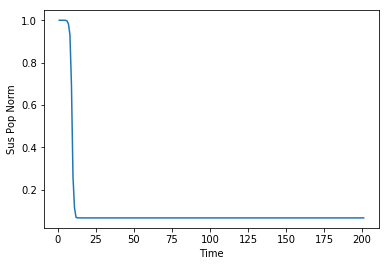

In [ ]:
import matplotlib.pyplot as m
a=100
m.plot(range(1,a+2),susceptible_pop_norm)
m.xlabel("Time")
m.ylabel("Sus Pop Norm")



Text(0,0.5,'Infected Pop Norm')

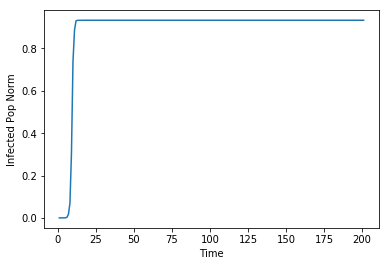

In [ ]:
m.plot(range(1,a+2),infected_pop_norm)
m.xlabel("Time")
m.ylabel("Infected Pop Norm")

#  SIR

In [ ]:
import numpy as np
# initialize the population vector from the origin-destination flow matrix
#OD=np.array([[10,12,3,5],[3,3,45,6],[3,2,4,5],[5,6,5,3]])
#N_k = np.abs(np.diagonal(OD) + OD.sum(axis=0) - OD.sum(axis=1))

locs_len = len(N_k)                 # number of locations
#print(locs_len)
SIR = np.zeros(shape=(locs_len, 3)) # make a numpy array with 3 columns for keeping track of the S, I, R groups
SIR[:,0] = N_k                      # initialize the S group with the respective populations
  
#first_infections = np.where(SIR[:, 0]<=50, SIR[:, 0]//20, 0)   # for demo purposes, randomly introduce infections

SIR[:, 0] = SIR[:, 0] - first_infections
SIR[:, 1] = SIR[:, 1] + first_infections                           # move infections to the I group
# row normalize the SIR matrix for keeping track of group proportions
row_sums = SIR.sum(axis=1)
SIR_n = SIR / row_sums[:, np.newaxis]
SIR_n=np.where(np.isnan(SIR_n),0,SIR_n)
beta = 0.3
gamma = 0.2

R0 = beta/gamma
beta_vec = np.full(locs_len,beta)
gamma_vec = np.full(locs_len, gamma)

  
# make copy of the SIR matrices 
SIR_sim = SIR.copy()
SIR_nsim = SIR_n.copy()

# run model
print(SIR_sim.sum(axis=0).sum() == N_k.sum())
from tqdm import tqdm_notebook
S = SIR_sim[:,0].sum()/N_k.sum()
I = SIR_sim[:,1].sum()/N_k.sum()
R = SIR_sim[:,2].sum()/N_k.sum()
infected_pop_norm = [I]
susceptible_pop_norm = [S]
recovered_pop_norm = [R]


for i in range(0,300):
    infected_mat = np.repeat([SIR_nsim[:,1],],repeats=3774,axis=0)
    OD_infected = np.round(OD*infected_mat)
    #print("OD_INF",OD_infected)
    inflow_infected = OD_infected.sum(axis=0)
    
    new_infect = beta_vec*SIR_sim[:, 0]*inflow_infected/(N_k + OD.sum(axis=0))+(beta_vec * SIR_sim[:, 0] * SIR_sim[:, 1] / N_k)
    new_infect=np.where(np.isnan(new_infect),0,new_infect)

    new_recovered = gamma_vec*SIR_sim[:, 1]
    new_recovered=np.where(np.isnan(new_recovered),0,new_recovered)
    
    #new_infect = np.where(new_infect>SIR_sim[:, 0], SIR_sim[:, 0], new_infect)
    SIR_sim[:, 0] = SIR_sim[:, 0] - new_infect
    SIR_sim[:, 1] = SIR_sim[:, 1] + new_infect - new_recovered
    SIR_sim[:, 2] = SIR_sim[:, 2] + new_recovered
    SIR_sim = np.where(SIR_sim<0,0,SIR_sim)
    # recompute the normalized SIR matrix
    row_sums = SIR_sim.sum(axis=1)
    SIR_nsim = SIR_sim / row_sums[:, np.newaxis]
    SIR_nsim=np.where(np.isnan(SIR_nsim),0,SIR_n)
    
    S = SIR_sim[:,0].sum()/N_k.sum()
    I = SIR_sim[:,1].sum()/N_k.sum()
    R = SIR_sim[:,2].sum()/N_k.sum()
    
    
    print(S, I, R)#normalised values of different compartment
    print('\n')
    infected_pop_norm.append(I)
    susceptible_pop_norm.append(S)
    recovered_pop_norm.append(R)

c:\users\mahe\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


True


c:\users\mahe\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in true_divide
c:\users\mahe\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide


0.9999996751740367 2.748518937235494e-07 4.997406970458204e-08


0.9999995927263178 3.023292339275019e-07 1.0494444844929192e-07


0.9999995020383714 3.325513332780768e-07 1.6541029523479233e-07


0.9999994022875266 3.65791911509192e-07 2.3192056189040768e-07


0.9999992925691669 4.023518889195e-07 3.050789441922461e-07


0.9999991718886087 4.425620693723378e-07 3.8554932197614605e-07


0.9999990391521805 4.867860837781185e-07 4.740617358506136e-07


0.9999988931574288 5.354236184861102e-07 5.714189526062373e-07


0.9999987325823686 5.889139551247979e-07 6.785036763034592e-07


0.999998555973682 6.477398506877393e-07 7.962864673284191e-07


0.9999983617337735 7.124317890669506e-07 9.258344374659669e-07


0.9999981481065671 7.835726377882721e-07 1.068320795279357e-06


0.9999979131619308 8.618027464001612e-07 1.2250353228370112e-06


0.999997654778602 9.478255258029258e-07 1.3973958721170434e-06


0.999997370625472 1.042413550769568e-06 1.5869609772776286e-06


0.9999970581410815 1.1464

0.9915288872942342 0.00048297166431679337 0.00798814104144889


0.9914601905614995 0.0004550740641880963 0.00808473537431225


0.9913960730532448 0.0004281767596053079 0.00817575018714987


0.991336283047479 0.0004023314134499147 0.00826138553907093


0.9912805742242535 0.0003775739539854701 0.008341851821760914


0.9912287070777049 0.00035392630973714523 0.008417366612558007


0.9911804500100455 0.00033139811544894733 0.008488151874505436


0.9911355801481534 0.0003099883542514913 0.008554431497595225


0.9910938839212176 0.00028968691033695875 0.008616429168445523


0.9910551574350778 0.0002704760144093474 0.008674366550512916


0.9910192066756883 0.00025233157091691434 0.008728461753394786


0.9909858475708092 0.00023522436161253941 0.008778928067578167


0.9909549059356906 0.00021912112440873485 0.008825972939900676


0.990926217325308 0.00020398550990961866 0.008869797164782423


0.9908996268126957 0.00018977892053979412 0.008910594266764348


0.9908749887101466 0.0001764612389810

0.9905720004378618 2.3223422364228192e-08 0.00942797633871579


0.9905719975752999 2.1441299836448903e-08 0.009427980983400261


0.9905719949324069 1.9795932862994865e-08 0.009427985271660227


0.990571992492326 1.8276827352570307e-08 0.0094279892308468


0.9905719902394933 1.6874294462852357e-08 0.00942799288621227


0.9905719881595401 1.5579388814845832e-08 0.009427996261071164


0.9905719862391996 1.4383851447378924e-08 0.009427999376948925


0.9905719844662236 1.328005714816693e-08 0.009428002253719215


0.9905719828293036 1.2260965825744639e-08 0.009428004909730647


0.9905719813179985 1.1320077612306604e-08 0.00942800736192381


0.9905719799226692 1.0451391411261202e-08 0.009428009625939333


0.9905719786344157 9.649366625250076e-09 0.009428011716217616


0.9905719774450213 8.908887820648754e-09 0.009428013646090942


0.9905719763468994 8.225232103275204e-09 0.009428015427868506


0.9905719753330461 7.594038997310206e-09 0.009428017072914926


0.9905719743969947 7.011282635386064

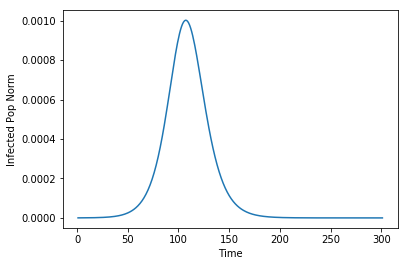

In [ ]:
import matplotlib.pyplot as m

a=len(infected_pop_norm)+1


m.plot(range(1,a),infected_pop_norm)
m.xlabel("Time")
m.ylabel("Infected Pop Norm")

m.show()

Text(0,0.5,'Sus Pop Norm')

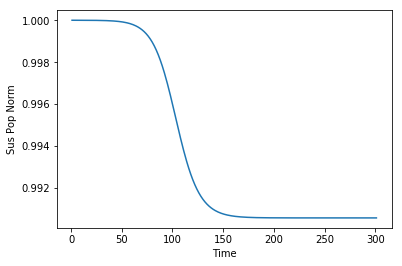

In [ ]:
m.plot(range(1,a),susceptible_pop_norm)
m.xlabel("Time")
m.ylabel("Sus Pop Norm")

Text(0,0.5,'recovered_pop_norm')

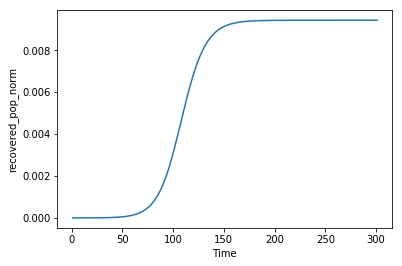

In [ ]:
m.plot(range(1,a),recovered_pop_norm)
m.xlabel("Time")
m.ylabel("recovered_pop_norm")

# sier

In [ ]:
import numpy as np
# initialize the population vector from the origin-destination flow matrix
#OD=np.array([[100,12,33,56],[34,23,435,56],[34,23,4,56],[55,67,56,43]])
#N_k = np.abs(np.diagonal(OD) + OD.sum(axis=0) - OD.sum(axis=1))

locs_len = len(N_k)                 # number of locations
#print(locs_len)
SIER = np.zeros(shape=(locs_len, 4)) # make a numpy array with 3 columns for keeping track of the S, I, R groups
SIER[:,0] = N_k                      # initialize the S group with the respective populations
  
#first_infections = np.full(locs_len,0)   # for demo purposes, randomly introduce infections


SIER[:, 0] = SIER[:, 0] - first_infections
SIER[:, 1] = SIER[:, 1] + first_infections                           # move infections to the I group
  
# row normalize the SIR matrix for keeping track of group proportions
row_sums = SIER.sum(axis=1)
SIER_n = SIER / row_sums[:, np.newaxis]
SIER_n=np.where(np.isnan(SIER_n),0,SIER_n)
#print(SIER)
# initialize parameters
beta = 0.3
gamma = 0.1
sigma = 0.2                                 # alpha
R0 = beta/gamma
beta_vec = np.full(locs_len, beta)
gamma_vec = np.full(locs_len, gamma)
sigma_vec = np.full(locs_len, sigma)
#public_trans_vec = np.full(locs_len, public_trans)
  
# make copy of the SIR matrices 
SIER_sim = SIER.copy()
SIER_nsim = SIER_n.copy()

# run model
#print("lem",len(SIER_sim))
from tqdm import tqdm_notebook
infected_pop_norm = []
susceptible_pop_norm = []
recovered_pop_norm = []
exp_pop_norm=[]
S = SIER_sim[:,0].sum()/N_k.sum()
I = SIER_sim[:,1].sum()/N_k.sum()
E = SIER_sim[:,2].sum()/N_k.sum()
R = SIER_sim[:,3].sum()/N_k.sum()
#    print(S, I,E, R)
 
    #print('\n')
infected_pop_norm.append(I)
susceptible_pop_norm.append(S)
exp_pop_norm.append(E)
recovered_pop_norm.append(R)
for i in range(0,200):
    infected_mat = np.repeat([SIER_nsim[:,1],],repeats=3774,axis=0)
    
    #infected_mat = np.array([SIER_nsim[:,1],]*locs_len).transpose()
    OD_infected =np.round (OD*infected_mat)
    OD_infected=np.where(np.isnan(OD_infected),0,OD_infected)
    inflow_infected = OD_infected.sum(axis=0)
    #inflow_infected = np.round(inflow_infected*sigma_vec)
    #print('total infected inflow: ', inflow_infected.sum(),"\t",inflow_infected)
    new_exposed = beta_vec * SIER_sim[:, 0] * inflow_infected / (N_k + OD.sum(axis=0)) + (beta_vec * SIER_sim[:, 0] * SIER_sim[:, 1] / N_k)
    new_exposed=np.where(np.isnan(new_exposed),0,new_exposed)
    new_infect = sigma_vec * SIER_sim[:, 2]
    new_infect=np.where(np.isnan(new_infect),0,new_infect)
    new_recovered = gamma_vec*SIER_sim[:, 1]
    new_recovered=np.where(np.isnan(new_recovered),0,new_recovered)
    new_infect = np.where(new_infect>SIER_sim[:, 0], SIER_sim[:, 0], new_infect)
    #S
    SIER_sim[:, 0] = SIER_sim[:, 0] - new_exposed
    #I
    SIER_sim[:, 1] = SIER_sim[:, 1] + new_infect - new_recovered
    #E  
    SIER_sim[:, 2] = SIER_sim[:, 2] + new_exposed - new_recovered
    #R
    SIER_sim[:, 3] = SIER_sim[:, 3] + new_recovered
                                                               

                                                               
    SIER_sim = np.where(SIER_sim<0,0,SIER_sim)
    # recompute the normalized SIR matrix
    row_sums = SIER_sim.sum(axis=1)
    SIER_nsim = SIER_sim / row_sums[:, np.newaxis]
    S = SIER_sim[:,0].sum()/N_k.sum()
    I = SIER_sim[:,1].sum()/N_k.sum()
    E = SIER_sim[:,2].sum()/N_k.sum()
    R = SIER_sim[:,3].sum()/N_k.sum()
    print(S, I,E, R)
    print('\n')
    infected_pop_norm.append(I)
    susceptible_pop_norm.append(S)
    exp_pop_norm.append(E)
    recovered_pop_norm.append(R)
    


c:\users\mahe\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
c:\users\mahe\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in true_divide
c:\users\mahe\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:84: RuntimeWarning: invalid value encountered in true_divide


0.9999996751740367 2.2488331367061916e-07 4.9968580052930236e-08 2.498703485229102e-08


0.999999607715465 2.123886983141433e-07 9.493882028218418e-08 4.747536621935293e-08


0.9999995440061805 2.1013759253916583e-07 1.37409234934339e-07 6.871423605076726e-08


0.9999994809733266 2.1660568027211704e-07 1.7942832956080875e-07 8.972799530468384e-08


0.9999994160015052 2.3083077815706707e-07 2.2273958288837156e-07 1.1138856333189556e-07


0.9999993467641208 2.5229561691903465e-07 2.6889388943728663e-07 1.3447164114760228e-07


0.9999992710899207 2.8084483311458855e-07 3.1933852790779216e-07 1.5970120283950574e-07


0.9999991868544605 3.1662805538468815e-07 3.754895046344439e-07 1.877856861509646e-07


0.9999990918886672 3.600631507731081e-07 4.387924925553902e-07 2.194484916894334e-07


0.9999989838984493 4.118153342068753e-07 5.107763953813006e-07 2.5545480676674417e-07


0.9999988566428075 4.727890798624479e-07 5.968505037947707e-07 2.966363401874317e-07


0.999998681122897 5.448802726

0.984032474667365 0.0011009843532029703 0.0 0.022158497448713677


0.9840314730452784 0.000990885917882673 0.0 0.02226859588403397


0.9840305983896899 0.0008917973260944059 0.0 0.02236768447582224


0.9840298327678147 0.0008026175934849652 0.0 0.022456864208431678


0.9840291601051816 0.0007223558341364687 0.0 0.022537125967780174


0.9840285687478251 0.0006501202507228218 0.0 0.02260936155119382


0.9840280480446062 0.0005851082256505396 0.0 0.022674373576266105


0.9840275877558134 0.0005265974030854857 0.0 0.022732884398831157


0.9840271804489873 0.0004739376627769371 0.0 0.022785544139139708


0.9840268191778848 0.0004265438964992435 0.0 0.0228329379054174


0.9840264989212215 0.000383889506849319 0.0 0.02287559229506732


0.9840262142849653 0.00034550055616438716 0.0 0.02291398124575226


0.9840259605850554 0.00031095050054794846 0.0 0.0229485313013687


0.9840257344003908 0.0002798554504931536 0.0 0.022979626351423487


0.9840255327467516 0.00025186990544383823 0.0 0.0230076118

Text(0,0.5,'Infected Pop Norm')

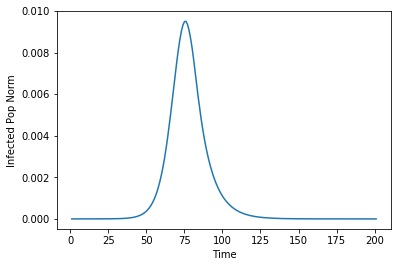

In [ ]:
import matplotlib.pyplot as m

a=200


m.plot(range(1,a+2),infected_pop_norm)
m.xlabel("Time")
m.ylabel("Infected Pop Norm")




Text(0,0.5,'Sus Pop Norm')

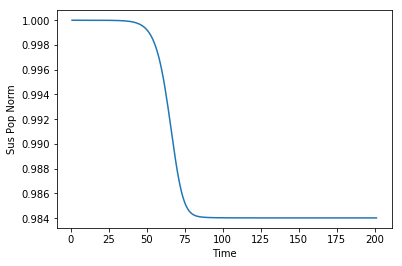

In [ ]:
m.plot(range(1,a+2),susceptible_pop_norm)
m.xlabel("Time")
m.ylabel("Sus Pop Norm")

Text(0,0.5,'recovered_pop_norm')

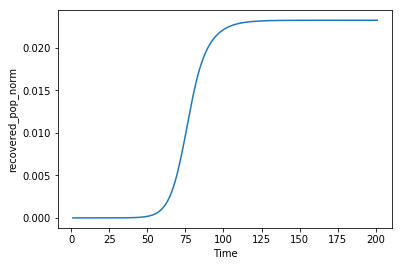

In [ ]:
m.plot(range(1,a+2),recovered_pop_norm)
m.xlabel("Time")
m.ylabel("recovered_pop_norm")

irrelevant

In [ ]:
#67.5
f6=[ (0.0368025,'H') ,( -0.08081249,'PU'),( 0.03491815,'AB'),( 0.03520085,'AR'),(0.07157052,'AO'),(-0.03510528,'R'),(1.2807395,'S')]

f6.sort(reverse=1)
print (f6)
  

[(1.2807395, 'S'), (0.07157052, 'AO'), (0.0368025, 'H'), (0.03520085, 'AR'), (0.03491815, 'AB'), (-0.03510528, 'R'), (-0.08081249, 'PU')]


In [ ]:

#80.41666666666667
f6=[ (0.03020729,'H') ,(  0.02643236,'PU'),(  0.03199124,'AB'),(  0.02623957,'AR'),(0.03872555,'AO'),( 0.02710894,'R'),( 0.04896782,'S')]

f6.sort(reverse=1)
print (f6)

[(0.04896782, 'S'), (0.03872555, 'AO'), (0.03199124, 'AB'), (0.03020729, 'H'), (0.02710894, 'R'), (0.02643236, 'PU'), (0.02623957, 'AR')]


In [ ]:

f6=[ (0.02851096261292696,'H') ,(0.027253656722605227,'PU'),(0.03151190088130534,'AB'),(0.023856106447055936,'AR'),(0.04312566079199314,'AO'),(0.021382376849651337,'R'),(0.04947066433727741,'S')]

f6.sort(reverse=1)
print (f6)

[(0.04947066433727741, 'S'), (0.04312566079199314, 'AO'), (0.03151190088130534, 'AB'), (0.02851096261292696, 'H'), (0.027253656722605227, 'PU'), (0.023856106447055936, 'AR'), (0.021382376849651337, 'R')]


In [ ]:
#67.5
f6=[ (0.09496378633601125,'H') ,( 0.04117832286516204,'PU'),( 0.09616057038889267,'AB'),( -0.0061854918417520825,'AR'),(0.16773841408081352,'AO'),(0.008936019098618998,'R'),(1.2731980675458907,'S')]

f6.sort(reverse=1)
print (f6)


[(1.2731980675458907, 'S'), (0.16773841408081352, 'AO'), (0.09616057038889267, 'AB'), (0.09496378633601125, 'H'), (0.04117832286516204, 'PU'), (0.008936019098618998, 'R'), (-0.0061854918417520825, 'AR')]


In [ ]:
#lstm 80%

heighest=[(0.04896782, 'S'), (0.03872555, 'AO'), (0.03199124, 'AB'), (0.03020729, 'H'), (0.02710894, 'R'), (0.02643236, 'PU'), (0.02623957, 'AR')]
avg=[(0.04947066433727741, 'S'), (0.04312566079199314, 'AO'), (0.03151190088130534, 'AB'), (0.02851096261292696, 'H'), (0.027253656722605227, 'PU'), (0.023856106447055936, 'AR'), (0.021382376849651337, 'R')]